### 实验二：磁性材料基本特性研究

In [ ]:
'''
You are a lab agent, and your task is to extract data faithfully from the images provided. 
If no image is provided, please tell the user to upload photos of his or her lab report.
Read the following instructions carefully before you answer.
- The images should contain clear, handwritten text. If any part is unclear, ask the user to supply a clearer image or transcribe the unclear part.
- Pay special attention to the unit used by the user. compare measure results with standard ones, and convert them if necessary. Automatically adjust magnitudes, and inform the user of the adjustments in text before the python snippet.
- When writing code you are expected to follow the given format strictly. If no warnings or failures occur, you should output a single python snippet, enclosed within triple backticks. You need not add extra comments to your answer.

The first experiment is 饱和磁滞回线测量, you need to extract above:
UR1 data and Uc data,
R_1, R_2, C_1 data

And output as the following format:

# UR1 and Uc should convert to mV
UR1 = [-38.42, 0.00 ...]
Uc = [0.00, 38.42 ...]
# R1 R2 should convert to ohms
R1 = ...
R2 = ...
# C1 should convert to farads
C1 = ...

The second experiment is 测量居里温度, you need to extract above:

U = 15.000V
initial U_0 = 1.320mV

and every temperature and corresponding voltage U.

Note that the data may have mutiple lines. Every first line is the temperature, and the second line is the corresponding voltage. You need to extract all the data.

And output as the following format:

# T should convert to degrees Celsius
T = [...]
# Uout should convert to mV
Uout = [...]
'''

'\nYou are a lab agent, and your task is to extract data faithfully from the images provided. \nIf no image is provided, please tell the user to upload photos of his or her lab report.\nRead the following instructions carefully before you answer.\n- The images should contain clear, handwritten text. If any part is unclear, ask the user to supply a clearer image or transcribe the unclear part.\n- Pay special attention to the unit used by the user. compare measure results with standard ones, and convert them if necessary. Automatically adjust magnitudes, and inform the user of the adjustments in text before the python snippet.\n- When writing code you are expected to follow the given format strictly. If no warnings or failures occur, you should output a single python snippet, enclosed within triple backticks. You need not add extra comments to your answer.\n\nThe first experiment is 饱和磁滞回线测量, you need to extract above:\nUR1 data and Uc data,\nR_1, R_2, C_1 data\n\nAnd output as the follo

In [ ]:
UR1 = [-38.42, 0.00, 146.6, 36.06, 0.00, -144.2,
    -72.91, 88.69, -54.88, 51.74, -44.69, 39.98, 70.56,
    -71.34, -54.88, 54.10, -29.01, 25.87, 13.83, -21.17, 27.44, -31.14]
Uc = [0.00, 51.69, 80.66, 0.00, -49.98, -79.52,
    -57.37, 69.30, -39.76, 38.06, -19.88, 13.63, 72.70,
    -70.43, -67.59, 68.16, -59.07, 61.34, -32.94, 34.08, -18.74, 18.74]
# Component values (converted to SI units)
R1 = 9.30          # ohms (Ω)
R2 = 1.7115e3      # ohms (converted from 1.7115 kΩ)
C1 = 4.387e-6      # farads (converted from 4.387 μF)

T = [25.6, 30.0, 40.0, 50.0, 61.1, 67.0, 75.5, 83.8, 87.9, 89.2, 89.8, 90.3, 90.7, 91.2, 91.7, 92.2, 92.9, 93.2, 93.4, 93.6, 93.8, 94.1, 94.5, 94.7, 95.2, 95.6, 96.2, 96.6, 97.3, 97.8, 98.5, 99.2, 99.8, 100.5, 101.4, 102.1, 103.1, 103.9]
Uout = [21.510, 21.496, 21.452, 21.391, 21.304, 21.266, 21.209, 21.154, 21.000, 20.500, 20.026, 19.423, 19.002, 18.432, 17.632, 17.000, 16.000, 15.500, 15.001, 14.500, 14.011, 13.502, 13.001, 12.5, 12.0, 11.554, 11.030, 10.537, 10.000, 9.5, 9.023, 8.512, 8.018, 7.536, 7.012, 6.511, 6.202, 5.515]

In [99]:
# 实验一的数据处理

L = 3.61 * 10**(-2)
S = 1.25 * 10**(-5)
N1 = 100
N2 = 100

if len(UR1) != len(Uc):
    print("UR1 data and Uc data must have the same length.")
    exit(-1)
cnt_data = len(UR1)

# convert mV to V
for i in range(cnt_data):
    Uc[i] /= 1000
    UR1[i] /= 1000

# calc B and H
B = []
H = []

for i in range(cnt_data):
    B.append(Uc[i] * R2 * C1 / N2 / S)
    H.append(UR1[i] * N1 / R1 / L)

# print for debug
# print(B)
# print(H)


In [100]:
# 实验一的图像和表格生成

from rich.console import Console
from rich.table import Table


table = Table(show_header=True, header_style="bold")
table.add_column("UR1 (mV)")
table.add_column("Uc (mV)")
table.add_column("磁感应强度 B (T)")
table.add_column("磁场强度 H (A/m)")

for i in range(cnt_data):
    table.add_row(f"{UR1[i] * 1000:.2f}", f"{Uc[i] * 1000:.2f}", f"{B[i]:.4f}", f"{H[i]:.4f}")

Console().print(table)


┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ UR1 (mV) ┃ Uc (mV) ┃ 磁感应强度 B (T) ┃ 磁场强度 H (A/m) ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ -38.42   │ 0.00    │ 0.0000           │ -11.4437         │
│ 0.00     │ 51.69   │ 0.3105           │ 0.0000           │
│ 146.60   │ 80.66   │ 0.4845           │ 43.6660          │
│ 36.06    │ 0.00    │ 0.0000           │ 10.7408          │
│ 0.00     │ -49.98  │ -0.3002          │ 0.0000           │
│ -144.20  │ -79.52  │ -0.4777          │ -42.9512         │
│ -72.91   │ -57.37  │ -0.3446          │ -21.7169         │
│ 88.69    │ 69.30   │ 0.4163           │ 26.4171          │
│ -54.88   │ -39.76  │ -0.2388          │ -16.3465         │
│ 51.74    │ 38.06   │ 0.2286           │ 15.4112          │
│ -44.69   │ -19.88  │ -0.1194          │ -13.3113         │
│ 39.98    │ 13.63   │ 0.0819           │ 11.9084          │
│ 70.56    │ 72.70   │ 0.4367           │ 21.0169          │
│ -71.34   │ -70.43  │ -0.4231          │ -21.2492         │
│ -54.88   │ -67.59  │ -0.4060          │ -16.3465         │
│ 54.10    │ 68.16   │ 0.4094           │ 16.1141          │
│ -29.01   │ -59.07  │ -0.3548          │ -8.6409          │
│ 25.87    │ 61.34   │ 0.3684           │ 7.7056           │
│ 13.83    │ -32.94  │ -0.1979          │ 4.1194           │
│ -21.17   │ 34.08   │ 0.2047           │ -6.3057          │
│ 27.44    │ -18.74  │ -0.1126          │ 8.1732           │
│ -31.14   │ 18.74   │ 0.1126           │ -9.2753          │
└──────────┴─────────┴──────────────────┴──────────────────┘

In [101]:
# 将点排序，使得可以从头到尾连接
# 如果结果不对，可以手动修改排序之后的结果

data = [[H[i], B[i]] for i in range(len(B))]
data = sorted(data, key=lambda x: x[0])  # 按 H 排序

B1, H1, B2, H2 = [], [], [], []
B1.append(data[0][1])
H1.append(data[0][0])
# 假设第 2 3 个点的 H 类似，那么 B 大的放在 B1 小的放在 B2
if data[1][1] > data[2][1]:
    B1.append(data[1][1])
    H1.append(data[1][0])
    B2.append(data[2][1])
    H2.append(data[2][0])
else:
    B1.append(data[2][1])
    H1.append(data[2][0])
    B2.append(data[1][1])
    H2.append(data[1][0])
for i in range(3, len(data)):
    if data[i][1] > B1[-1]:
        B1.append(data[i][1])
        H1.append(data[i][0])
    else:
        B2.append(data[i][1])
        H2.append(data[i][0])

H, B = H1, B1
# H2, B2 翻转之后加入 H, B
H += H2[::-1]
B += B2[::-1]


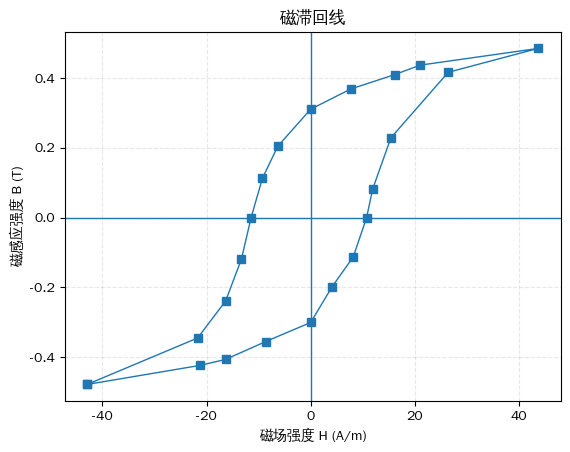

In [102]:
# 输出图像
# 如果曲线不对，那就手动修改一下顺序

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 设置中文字体

plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 已经把点按轨迹顺序排好了

H = np.asarray(H, dtype=float)
B = np.asarray(B, dtype=float)

# 添加一个点，使得首尾闭合
H_plot = np.r_[H, H[0]]
B_plot = np.r_[B, B[0]]

fig, ax = plt.subplots()

ax.axhline(0, linewidth=1)
ax.axvline(0, linewidth=1)

ax.plot(H_plot, B_plot, linestyle='-', marker='s', linewidth=1)
ax.set_title('磁滞回线')

ax.set_xlabel('磁场强度 H (A/m)')
ax.set_ylabel('磁感应强度 B (T)')
ax.grid(True, linestyle='--', alpha=0.3)
ax.margins(x=0.05, y=0.05)

plt.show()

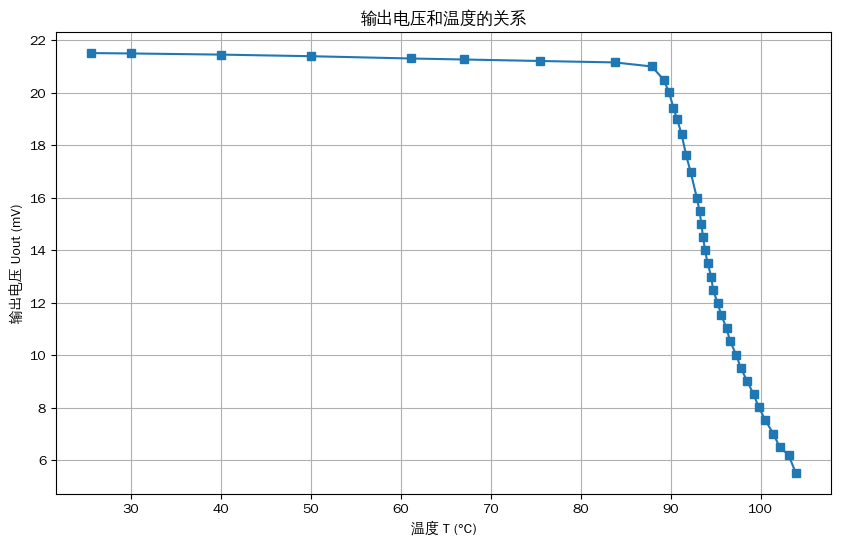

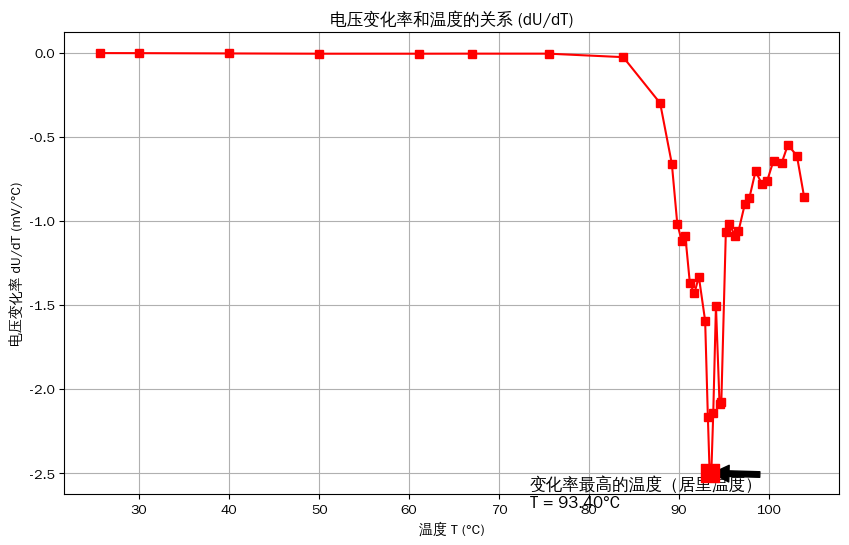

In [103]:
import matplotlib.pyplot as plt
import numpy as np

 
# 第一张图：电压与温度的关系

plt.figure(figsize=(10, 6))
plt.plot(T, Uout, marker='s', linestyle='-')

plt.title('输出电压和温度的关系')
plt.xlabel('温度 T (°C)')
plt.ylabel('输出电压 Uout (mV)')
plt.grid(True)

plt.show()

# 第二张图：电压的导数与温度的关系

T = np.asarray(T, dtype=float)
Uout = np.asarray(Uout, dtype=float)

dU_dt = np.gradient(Uout, T)

# 找到绝对值最大的点
max_index = 0
for i in range(1, len(dU_dt) - 1):
    if abs(dU_dt[i]) > abs(dU_dt[max_index]):
        max_index = i

plt.figure(figsize=(10, 6))
plt.plot(T, dU_dt, marker='s', linestyle='-', color='r')

# 在图像上标注 max_index 点

plt.scatter(T[max_index], dU_dt[max_index], color='red', s=150, zorder=5, 
            label=f'Max |dU/dT|',
             marker='s')

plt.annotate(f'变化率最高的温度（居里温度）\nT = {T[max_index]:.2f}°C',
             xy=(T[max_index], dU_dt[max_index]),
             xytext=(T[max_index] - 20, dU_dt[max_index] - 0.2), # Position of the text
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.title('电压变化率和温度的关系 (dU/dT)')
plt.xlabel('温度 T (°C)')
plt.ylabel('电压变化率 dU/dT (mV/°C)')
plt.grid(True)

plt.show()